# Depression Sentiment analysis with Embedding and LSTM 

# Import Dependince

In [1]:
import numpy as np
import pandas as pd
import nltk
import re
import string
from nltk.corpus import stopwords
nltk.download("stopwords")
stemmer = nltk.SnowballStemmer("english")
stopword=set(stopwords.words('english'))
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

[nltk_data] Downloading package stopwords to /Users/vikky/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Data collection

In [2]:
#loading the dataset panda dataframe
data = pd.read_csv('depression_dataset_reddit_cleaned.csv')

In [3]:
#check first five rows of the dataset
data.head()

,clean_text,is_depression
0,we understand that most people who reply immed...,1
1,welcome to r depression s check in post a plac...,1
2,anyone else instead of sleeping more when depr...,1
3,i ve kind of stuffed around a lot in my life d...,1
4,sleep is my greatest and most comforting escap...,1


In [4]:
#check last five rows of the dataset
data.tail()

,clean_text,is_depression
7726,is that snow,0
7727,moulin rouge mad me cry once again,0
7728,trying to shout but can t find people on the list,0
7729,ughh can t find my red sox hat got ta wear thi...,0
7730,slept wonderfully finally tried swatching for ...,0


In [5]:
#check columns of the dataset
data.columns

Index(['clean_text', 'is_depression'], dtype='object')

In [6]:
#check more infomation of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7731 entries, 0 to 7730
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   clean_text     7731 non-null   object
 1   is_depression  7731 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 120.9+ KB


In [7]:
#check mathmatic realtionship of the dataset
data.describe()

,is_depression
count,7731.000000
mean,0.495537
std,0.500012
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


In [8]:
#check missing value of the dataset
data.isnull().sum()

clean_text       0
is_depression    0
dtype: int64

# EDA

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
data['is_depression'].value_counts()

0    3900
1    3831
Name: is_depression, dtype: int64

/Users/vikky/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='is_depression', ylabel='count'>

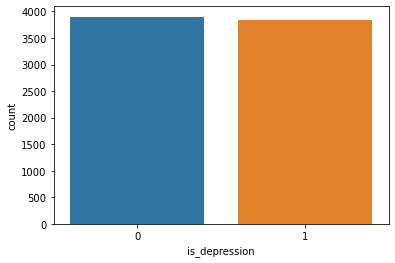

In [11]:
#count the valur is_depression dataset colums
sns.countplot(data['is_depression'])

In [12]:
#cleaning the dataset
def clean(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = [word for word in text.split(' ') if word not in stopword]
    text=" ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text=" ".join(text)
    return text

In [14]:
# apply clean function for dataset colum clean_text 
data["clean_text"] = data["clean_text"].apply(clean)

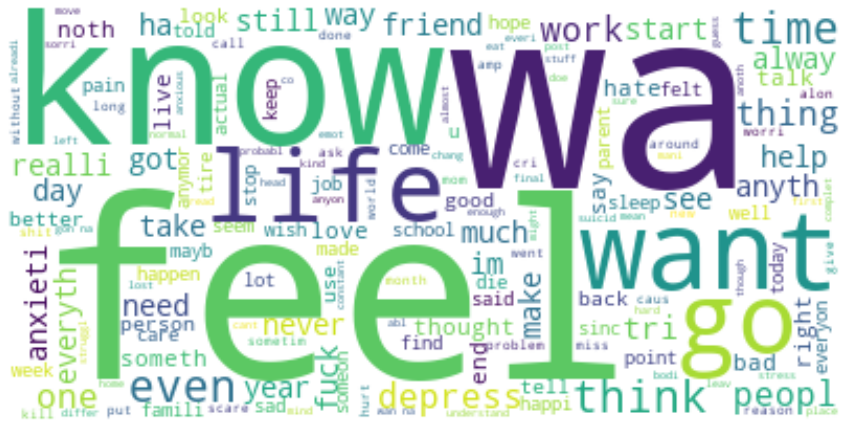

In [15]:
#Now let’s have a look at the kind of words people use in the is_depression :
text = " ".join(i for i in data.clean_text)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# Spliting the dataset

In [16]:
#spliting the dataset in x and y
x = data["clean_text"]
y = data["is_depression"]

In [17]:
#print x and y
print(x)
print(y)

0       understand peopl repli immedi op invit talk pr...
1       welcom r depress check post place take moment ...
2       anyon els instead sleep depress stay night avo...
3       kind stuf around lot life delay inevit work jo...
4       sleep greatest comfort escap whenev wake day l...
                              ...                        
7726                                                 snow
7727                                  moulin roug mad cri
7728                            tri shout find peopl list
7729    ughh find red sox hat got ta wear creepi nick ...
7730    slept wonder final tri swatch new project clas...
Name: clean_text, Length: 7731, dtype: object
0       1
1       1
2       1
3       1
4       1
       ..
7726    0
7727    0
7728    0
7729    0
7730    0
Name: is_depression, Length: 7731, dtype: int64


# Train-Test split

In [18]:
#spliting the dataset in X_train and Y_train
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.2)

In [19]:
#check shape X_train and Y_train
print(X_train.shape,X_test.shape,Y_train.shape,Y_test.shape)

(6184,) (1547,) (6184,) (1547,)


# Text Vectorization

In [20]:
#using Text Vectorizatio
round(sum([len(i.split()) for i in X_train])/len(X_train))

34

In [21]:
# import TextVectorization
import tensorflow as tf
from tensorflow.keras.layers import TextVectorization

In [22]:
# spliting the dataset in text_vectorizer
max_vocab_length = 10000 
max_length = 34 

text_vectorizer = TextVectorization(max_tokens=max_vocab_length,
                                    output_mode="int",
                                    output_sequence_length=max_length)

In [23]:
#check X_train after splitng Text_vectorizer
text_vectorizer.adapt(X_train)

In [24]:
#finf Words in vocab
words_in_vocab = text_vectorizer.get_vocabulary()
top_5_words = words_in_vocab[:5]
bottom_5_words = words_in_vocab[-5:] 
print(f"Vocablary size: {len(words_in_vocab)}")
print(f"Top 5 most common words: {top_5_words}")
print(f"Bottom 5 least common words:: {bottom_5_words}")

Vocablary size: 10000
Top 5 most common words: ['', '[UNK]', 'feel', 'wa', 'like']
Bottom 5 least common words:: ['inna', 'inlov', 'inlaw', 'inkart', 'ink']


# Embedding Layer

In [25]:
#using Embedding layer
from tensorflow.keras import layers 

embedding = layers.Embedding(input_dim=max_vocab_length, output_dim=128, 
                             embeddings_initializer="uniform", 
                             input_length=max_length 
                             )

In [26]:
from tensorflow.keras import layers
inputs = layers.Input(shape=(1,), dtype=tf.string) 
x = text_vectorizer(inputs) 
x = embedding(x) 
x = layers.GlobalAveragePooling1D()(x) 
outputs = layers.Dense(1, activation="sigmoid")(x) 
model_1 = tf.keras.Model(inputs, outputs, name="model_1_dense")

In [27]:
#model compile
model_1.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [28]:
#train model
history = model_1.fit(X_train,Y_train,validation_data=(X_test,Y_test),epochs=10)

Epoch 1/10
194/194 [==============================] - 8s 27ms/step - loss: 0.4695 - accuracy: 0.8357 - val_loss: 0.3507 - val_accuracy: 0.8655
Epoch 2/10
194/194 [==============================] - 5s 25ms/step - loss: 0.2837 - accuracy: 0.8991 - val_loss: 0.2763 - val_accuracy: 0.8966
Epoch 3/10
194/194 [==============================] - 5s 25ms/step - loss: 0.2158 - accuracy: 0.9221 - val_loss: 0.2265 - val_accuracy: 0.9147
Epoch 4/10
194/194 [==============================] - 5s 27ms/step - loss: 0.1663 - accuracy: 0.9402 - val_loss: 0.1883 - val_accuracy: 0.9276
Epoch 5/10
194/194 [==============================] - 6s 31ms/step - loss: 0.1296 - accuracy: 0.9560 - val_loss: 0.1622 - val_accuracy: 0.9412
Epoch 6/10
194/194 [==============================] - 5s 27ms/step - loss: 0.1046 - accuracy: 0.9680 - val_loss: 0.1458 - val_accuracy: 0.9502
Epoch 7/10
194/194 [==============================] - 6s 30ms/step - loss: 0.0867 - accuracy: 0.9753 - val_loss: 0.1340 - val_accuracy: 0.9606

In [30]:
history.history

{'loss': [0.46946293115615845,
  0.2837080955505371,
  0.21580171585083008,
  0.16626225411891937,
  0.12964126467704773,
  0.10459963977336884,
  0.08674520999193192,
  0.07382360845804214,
  0.06380867213010788,
  0.05686891824007034],
 'accuracy': [0.835705041885376,
  0.8990944623947144,
  0.9220569133758545,
  0.9401682019233704,
  0.9560155272483826,
  0.9679818749427795,
  0.9752587080001831,
  0.9788162708282471,
  0.9820504784584045,
  0.9843143820762634],
 'val_loss': [0.3507160246372223,
  0.2762649357318878,
  0.2264728993177414,
  0.18832530081272125,
  0.16224391758441925,
  0.14581571519374847,
  0.13403543829917908,
  0.13141471147537231,
  0.12711641192436218,
  0.12834328413009644],
 'val_accuracy': [0.8655462265014648,
  0.8965740203857422,
  0.9146735668182373,
  0.9276018142700195,
  0.9411764740943909,
  0.9502262473106384,
  0.9605688452720642,
  0.9579831957817078,
  0.9599224328994751,
  0.9579831957817078]}

# Classification Report for Model 1

In [32]:
Y_pred=model_1.predict(X_test)
Y_pred=(Y_pred>=0.5).astype("int")

49/49 [==============================] - 0s 2ms/step


In [33]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.93      0.98      0.96       770
           1       0.98      0.93      0.96       777

    accuracy                           0.96      1547
   macro avg       0.96      0.96      0.96      1547
weighted avg       0.96      0.96      0.96      1547



# LSTM model

In [34]:
#using Lstm model
from tensorflow.keras import layers
inputs = layers.Input(shape=(1,), dtype=tf.string) 
x = text_vectorizer(inputs) 
x = embedding(x) 
x = layers.LSTM(64, activation="tanh")(x)
outputs = layers.Dense(1, activation="sigmoid")(x) 
model_2 = tf.keras.Model(inputs, outputs, name="model_2_lstm")

In [35]:
#compile model
model_2.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [36]:
#train model using lstm
history = model_2.fit(X_train,Y_train,validation_data=(X_test,Y_test),epochs=10)

Epoch 1/10
194/194 [==============================] - 17s 67ms/step - loss: 0.1219 - accuracy: 0.9657 - val_loss: 0.1875 - val_accuracy: 0.9418
Epoch 2/10
194/194 [==============================] - 13s 67ms/step - loss: 0.0443 - accuracy: 0.9880 - val_loss: 0.1772 - val_accuracy: 0.9463
Epoch 3/10
194/194 [==============================] - 13s 67ms/step - loss: 0.0337 - accuracy: 0.9898 - val_loss: 0.1912 - val_accuracy: 0.9535
Epoch 4/10
194/194 [==============================] - 12s 61ms/step - loss: 0.0386 - accuracy: 0.9905 - val_loss: 0.1657 - val_accuracy: 0.9489
Epoch 5/10
194/194 [==============================] - 12s 61ms/step - loss: 0.0285 - accuracy: 0.9927 - val_loss: 0.1657 - val_accuracy: 0.9457
Epoch 6/10
194/194 [==============================] - 12s 60ms/step - loss: 0.0175 - accuracy: 0.9958 - val_loss: 0.2598 - val_accuracy: 0.9438
Epoch 7/10
194/194 [==============================] - 12s 61ms/step - loss: 0.0176 - accuracy: 0.9947 - val_loss: 0.2520 - val_accuracy:

In [37]:
history.history

{'loss': [0.12194930762052536,
  0.04434535279870033,
  0.03370266035199165,
  0.03857898712158203,
  0.028453631326556206,
  0.01745663397014141,
  0.01756499893963337,
  0.022268325090408325,
  0.013344790786504745,
  0.0361902117729187],
 'accuracy': [0.9657179713249207,
  0.988033652305603,
  0.989812433719635,
  0.9904592633247375,
  0.9927231669425964,
  0.9957956075668335,
  0.994663655757904,
  0.9930465817451477,
  0.9962807297706604,
  0.9896507263183594],
 'val_loss': [0.18753276765346527,
  0.17715151607990265,
  0.19118280708789825,
  0.16568949818611145,
  0.1657085120677948,
  0.2597535252571106,
  0.2520136535167694,
  0.21087147295475006,
  0.3077019453048706,
  0.26683393120765686],
 'val_accuracy': [0.94182288646698,
  0.9463477730751038,
  0.953458309173584,
  0.9489334225654602,
  0.9457013607025146,
  0.9437621235847473,
  0.9437621235847473,
  0.9482870101928711,
  0.930187463760376,
  0.9392372369766235]}

# Classification Report for Model 2

In [38]:
Y_pred=model_2.predict(X_test)
Y_pred=(Y_pred>=0.5).astype("int")

49/49 [==============================] - 1s 11ms/step


In [39]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.95      0.93      0.94       770
           1       0.93      0.95      0.94       777

    accuracy                           0.94      1547
   macro avg       0.94      0.94      0.94      1547
weighted avg       0.94      0.94      0.94      1547

